In [61]:
import numpy  as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import RandomizedLasso
import sklearn.model_selection as ms
from sklearn.feature_selection import SelectFromModel 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, roc_auc_score, roc_curve

In [139]:
redmit = pd.read_csv('./Data/new_data.csv')
readmit = pd.read_csv('./gbm_dataClustering.csv')
redmit.columns
readmit.columns

Index(['Unnamed: 0', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2', 'target'],
      dtype='object')

In [140]:
#redmit['Unnamed: 0'].head
redmit = redmit.drop(['encounter_id','Unnamed: 0'], axis = 1)
redmit.columns
readmit = readmit.drop('Unnamed: 0',axis=1)
readmit.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2', 'target'],
      dtype='object')

In [141]:
total = readmit.isna().sum().sort_values(ascending=False)
total

target                      0
clustering2                 0
glipizide                   0
acetohexamide               0
glimepiride                 0
chlorpropamide              0
nateglinide                 0
repaglinide                 0
metformin                   0
A1Cresult                   0
max_glu_serum               0
number_diagnoses            0
number_inpatient            0
number_emergency            0
number_outpatient           0
num_medications             0
num_procedures              0
num_lab_procedures          0
medical_specialty           0
time_in_hospital            0
admission_source_id         0
discharge_disposition_id    0
admission_type_id           0
age                         0
gender                      0
glyburide                   0
tolbutamide                 0
pioglitazone                0
metformin-pioglitazone      0
clustering4                 0
clustering3                 0
t_diag                      0
s_diag                      0
f_diag    

In [27]:
r_names = redmit.columns
for i in r_names:
    label = preprocessing.LabelEncoder()
    redmit[i] = label.fit_transform(redmit[i])
redmit.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitin30days',
       'diabetic', 'f_diag', 's_diag', 't_diag', 'self_pay',
       'medicaid/medicare', 'coverByInsurance'],
      dtype='object')

In [31]:
x_names_list = []
for i in r_names:
    if i != 'readmitin30days':
        x_names_list.append(i)
#x = redmit[r_names[1:-1]]
x_names_list


['patient_nbr',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'diabetic',
 'f_diag',
 's_diag',
 't_diag',
 'self_pay',
 'medicaid/medicare',
 'coverByInsurance']

In [154]:

names = readmit.columns[:-1]
names
x = readmit[names]
y = readmit['target']
#x
#y

In [201]:
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, train_size=0.5, test_size=0.5)
x_train.shape
x_train.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2'],
      dtype='object')

In [172]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [173]:
pca.explained_variance_ratio_
pca.n_components_
pca.n_features_

51

In [174]:
pca.explained_variance_ratio_

array([5.22908555e-01, 2.38175408e-01, 8.24043544e-02, 3.53353303e-02,
       3.02255740e-02, 2.18009682e-02, 1.96909204e-02, 1.55505992e-02,
       8.44546509e-03, 5.03446215e-03, 3.22529667e-03, 3.00876078e-03,
       2.51293941e-03, 2.12338447e-03, 1.86754383e-03, 1.37829676e-03,
       1.09117656e-03, 1.07757080e-03, 9.45993924e-04, 4.99873475e-04,
       4.41563394e-04, 3.40824538e-04, 3.24246139e-04, 3.09169309e-04,
       1.98035637e-04, 1.78151931e-04, 1.39231061e-04, 1.22569197e-04,
       1.22123503e-04, 1.19989520e-04, 9.65166676e-05, 7.41708241e-05,
       7.09488814e-05, 6.84776397e-05, 4.23917735e-05, 2.23489848e-05,
       1.00224311e-05, 9.57365999e-06, 4.32437307e-06, 1.29329707e-06,
       5.43725319e-07, 4.66073028e-07, 2.84928725e-07, 1.81224621e-07,
       7.77322143e-08, 2.40665151e-33, 2.40665151e-33, 2.40665151e-33,
       2.40665151e-33, 2.40665151e-33, 2.40665151e-33])

In [186]:
ratio = 0
num = 0
for i in pca.explained_variance_ratio_:
    if ratio < 0.95:
        ratio += i
        num += 1
print(num,ratio)

7 0.9508183018663204


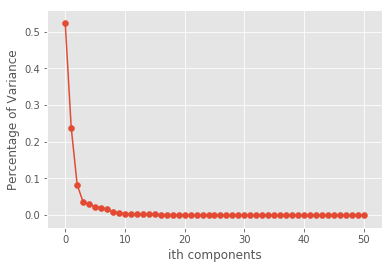

In [176]:
pca.set_params(n_components=None)
pca.fit(x_train)
plt.plot(range(51), pca.explained_variance_ratio_)
plt.scatter(range(51), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()


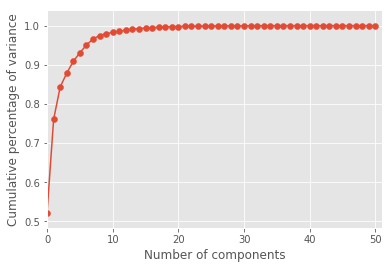

In [177]:
plt.scatter(range(0, 51), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(0, 51), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 51)
plt.show()

In [199]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [205]:
NB = GaussianNB()
#NB.set_params(binarize = 4.22)
NB.fit(x_train, y_train)
NB.score(x_train, y_train)

0.11713145844388106

In [207]:
print('ROC-AUC', roc_auc_score(y_score=NB.predict(x_test), y_true=y_test))

ROC-AUC 0.500088350712616


In [191]:
n_components=7
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(x_train)
x_train_scale7 = pca.transform(x_train)
pca.fit(x_test)
x_test_scale7 = pca.transform(x_test)
x_test_scale7

array([[ 0.03447705,  0.48788134],
       [ 0.20329154, -0.2381831 ],
       [-1.93495213,  2.9741654 ],
       ...,
       [-2.06964043, -0.28684252],
       [ 0.23935151, -0.27259259],
       [ 0.71321879,  0.01212907]])

In [192]:
accuracy = []
line = np.linspace(start=0, stop=20, num=200)
for i in line:
    NB.set_params(binarize = i)
    NB.fit(x_train_scale7, y_train)
    accuracy.append(NB.score(x_train_scale7, y_train))
    
accuracy = np.array(accuracy)
print("The highest accuracy is: " + str(accuracy.max()))
print("The corresponding threshold is: " + str(line[accuracy.argmax()]))

The highest accuracy is: 0.8891574789222334
The corresponding threshold is: 4.2211055276381915


In [115]:
line = np.linspace(start=0, stop=10, num=100)
print(line)

[0.         0.08080808 0.16161616 0.24242424 0.32323232 0.4040404
 0.48484848 0.56565657 0.64646465 0.72727273 0.80808081 0.88888889
 0.96969697 1.05050505 1.13131313 1.21212121 1.29292929 1.37373737
 1.45454545 1.53535354 1.61616162 1.6969697  1.77777778 1.85858586
 1.93939394 2.02020202 2.1010101  2.18181818 2.26262626 2.34343434
 2.42424242 2.50505051 2.58585859 2.66666667 2.74747475 2.82828283
 2.90909091 2.98989899 3.07070707 3.15151515 3.23232323 3.31313131
 3.39393939 3.47474747 3.55555556 3.63636364 3.71717172 3.7979798
 3.87878788 3.95959596 4.04040404 4.12121212 4.2020202  4.28282828
 4.36363636 4.44444444 4.52525253 4.60606061 4.68686869 4.76767677
 4.84848485 4.92929293 5.01010101 5.09090909 5.17171717 5.25252525
 5.33333333 5.41414141 5.49494949 5.57575758 5.65656566 5.73737374
 5.81818182 5.8989899  5.97979798 6.06060606 6.14141414 6.22222222
 6.3030303  6.38383838 6.46464646 6.54545455 6.62626263 6.70707071
 6.78787879 6.86868687 6.94949495 7.03030303 7.11111111 7.191919

In [209]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [218]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)


/Users/heqianli/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [242]:
readmit_majority = readmit[readmit.target==0]
readmit_minority = readmit[readmit.target==1]
readmit_majority.shape
#readmit_minority_upsampled = resample(readmit_minority, 
                                 #replace=True,     # sample with replacement
                                 #n_samples=576,    # to match majority class
                                 #random_state=123)

(90409, 52)

In [219]:
roc_auc_score(y_score=LDA.predict(x_test), y_true=y_test)

0.5162968130664114

In [225]:
from sklearn.linear_model import LogisticRegression

In [237]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
predictprobs = lg.predict_proba(x_train)
predictvalues = lg.predict(x_train)
a = y_train.values

predicttest = lg.predict(x_test)
predicttestprobs = lg.predict_proba(x_test)
predictprobs
predicttest
back = 0
no = 0
for i in predicttest:
    if i == 1:
        back += 1
    elif i == 0:
        no += 1
back/len(predicttest)
len(predicttestprobs)

/Users/heqianli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


50883

In [229]:
roc_auc_score(y_score=predicttest, y_true=y_test)

0.5082952790721853

In [240]:
y_train.value_counts()

0    45158
1     5725
Name: target, dtype: int64